In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('dataset_bank.csv', delimiter=';')
start_data = data

# Статистичні дані

In [3]:
statistic = data.describe()
statistic

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Медіана (вік)

In [4]:
median_age = [np.median(data['age']), np.median(data['duration']),
             np.median(data['campaign']), np.median(data['pdays']),
             np.median(data['previous'])]
median_age

[38.0, 180.0, 2.0, 999.0, 0.0]

# Математичне сподівання

In [5]:
expected = pd.Series.to_list(data['age'].value_counts())
expected_dataset = pd.Series.to_list(data['age'].value_counts().reset_index())
for i in range(len(expected_dataset)):
    expected_dataset[i][1] = expected[i] / len(data)

def func(a, b):
    return a*b

expected_value = 0

for i in range(len(expected_dataset)):
    expected_value += func(expected_dataset[i][0], expected_dataset[i][1])

expected_value

40.02406040594348

# Дисперсія

In [6]:
dispersion = np.var(data)
dispersion

age                 108.599814
duration          67224.096709
campaign              7.672789
pdays             34934.839084
previous              0.244921
emp.var.rate          2.467855
cons.price.idx        0.335048
cons.conf.idx        21.419695
euribor3m             3.008235
nr.employed        5220.156508
dtype: float64

In [7]:
pd.isnull(data).any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Графіки

In [10]:
age_counts = data['age'].value_counts()

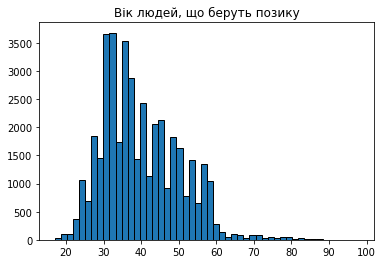

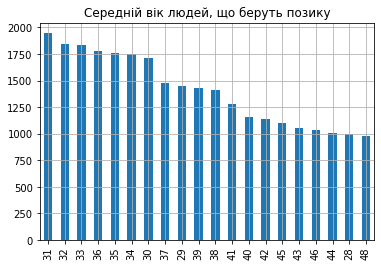

In [11]:
plt.figure(figsize=(6,4))
plt.hist(data['age'], bins = 50, ec='black')
plt.title('Вік людей, що беруть позику')
plt.show()

age_counts[:20].plot(kind='bar', grid=True, title='Середній вік людей, що беруть позику')

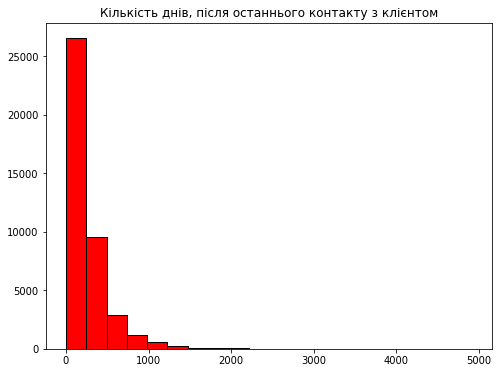

In [12]:
plt.figure(figsize=(8,6))
plt.hist(data['duration'], bins=20 ,ec='black', color='red')
plt.title('Кількість днів, після останнього контакту з клієнтом')
plt.show()

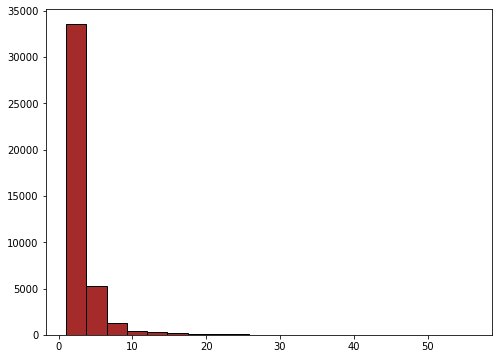

In [13]:
plt.figure(figsize=(8,6))
plt.hist(data['campaign'], bins=20 ,ec='black', color='brown')
#plt.title('Кількість днів, після останнього контакту з клієнтом')
plt.show()

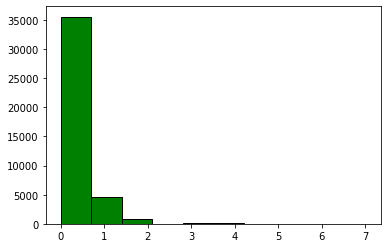

In [14]:
# plt.figure(figsize=(8,6))
plt.hist(data['previous'], bins=10, ec='black', color='green')
#plt.title('Кількість контактів з клієнтом з початку видачі позики')
plt.show()

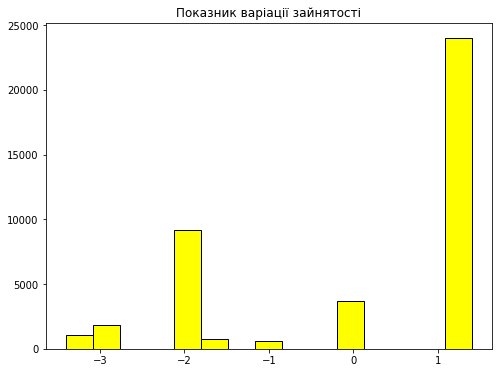

In [15]:
plt.figure(figsize=(8,6))
plt.hist(data['emp.var.rate'], bins=15, ec='black', color='yellow')
plt.title('Показник варіації зайнятості')
plt.show()

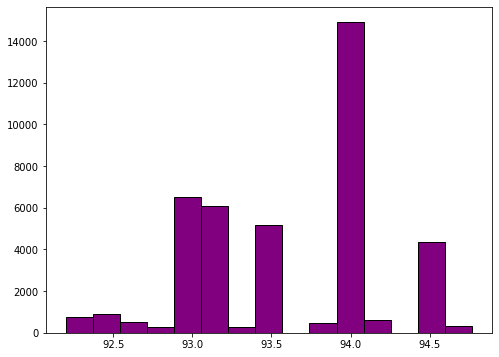

In [16]:
plt.figure(figsize=(8,6))
plt.hist(data['cons.price.idx'], bins=15, ec='black', color='purple')
plt.show()

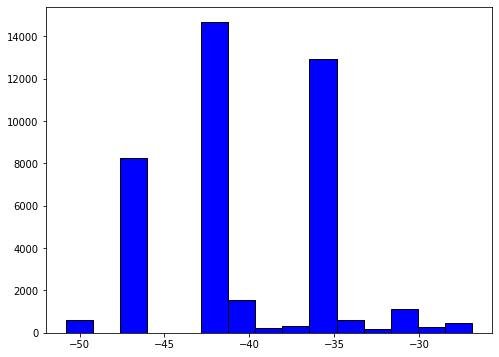

In [17]:
plt.figure(figsize=(8,6))
plt.hist(data['cons.conf.idx'], bins=15, ec='black', color='blue')
plt.show()

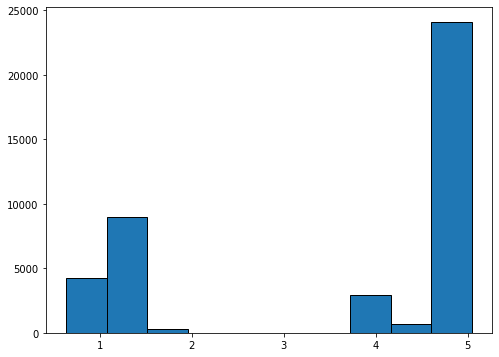

In [18]:
plt.figure(figsize=(8,6))
plt.hist(data['euribor3m'], ec='black')#, bins=5, ec='black')
plt.show()

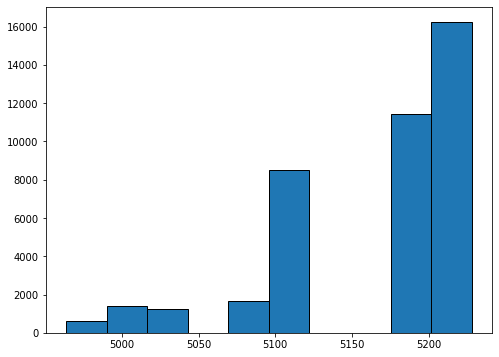

In [19]:
plt.figure(figsize=(8,6))
plt.hist(data['nr.employed'], ec='black')#, bins=5, ec='black')
plt.show()

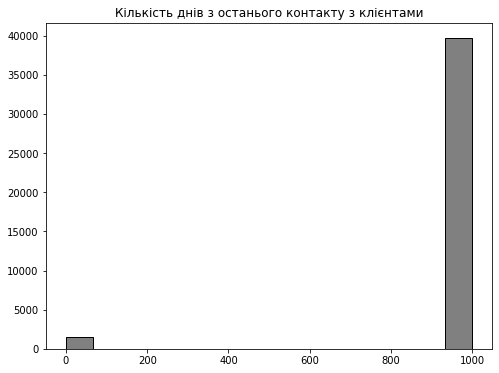

In [20]:
plt.figure(figsize=(8,6))
plt.hist(data['pdays'], bins=15, ec='black', color='grey')
plt.title('Кількість днів з останього контакту з клієнтами')
plt.show()

<Figure size 432x288 with 0 Axes>

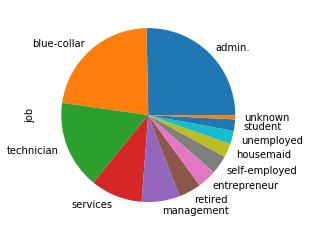

In [21]:
plt.figure()
#plt.pie(data['job'])
plt.show()

job_counts = data['job'].value_counts()
job_counts.plot(kind='pie', grid=True)
#plt.title('Професії людей, що беруть позику')

In [22]:
job_counts = [(x / data.shape[0]) * 100 for x in job_counts]
job_counts

[25.303486452364766,
 22.46770904146839,
 16.37127318636496,
 9.636301835486064,
 7.099155093716616,
 4.175973584539186,
 3.5350101971447994,
 3.450033990482665,
 2.5735651160532194,
 2.4618821015829853,
 2.1244051665533648,
 0.8012042342429834]

In [23]:
y_counts=data['y'].value_counts()
S = ['no', 'yes']
print(y_counts)

no     36548
yes     4640
Name: y, dtype: int64


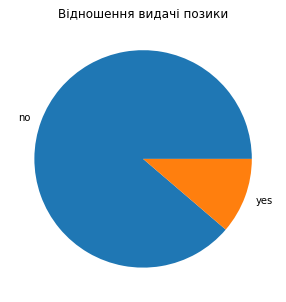

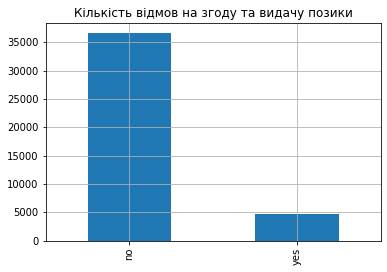

In [24]:
fig = plt.figure(figsize=(5,5))
plt.pie(y_counts, labels=S)
plt.title('Відношення видачі позики')

plt.figure()
y_counts.plot(kind='bar', grid=True, title='Кількість відмов на згоду та видачу позики')

<Figure size 432x288 with 0 Axes>

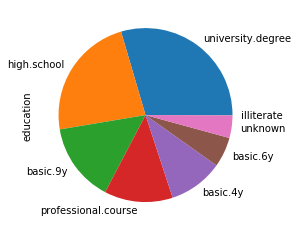

In [25]:
plt.figure()
plt.show()

job_counts = data['education'].value_counts()
job_counts.plot(kind='pie', grid=True)

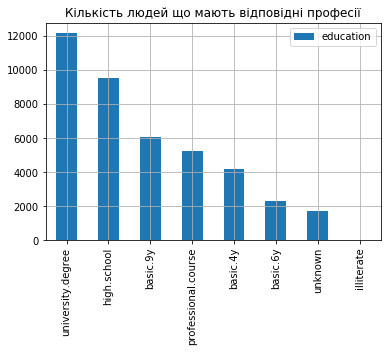

In [26]:
education_counts = data['education'].value_counts()
education_counts.plot(kind='bar', grid=True, legend=True, title='Кількість людей що мають відповідні професії')

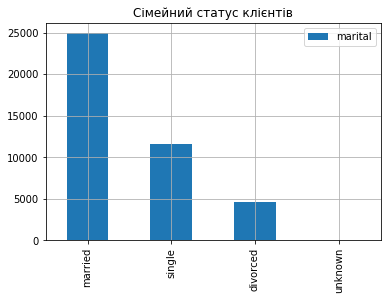

In [27]:
marital_counts = data['marital'].value_counts()
marital_counts.plot(kind='bar', grid=True, legend=True, title='Сімейний статус клієнтів')

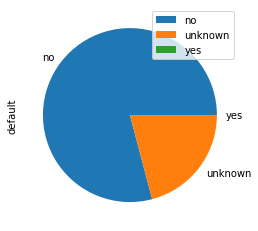

In [28]:
default_counts = data['default'].value_counts()
default_counts.plot(kind='pie', grid=True, legend=True)#title='Відсоток людей, що мали заборгованість')

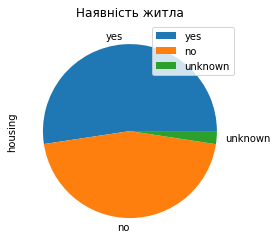

In [29]:
housing_counts = data['housing'].value_counts(normalize=True)
housing_counts.plot(kind='pie', grid=True, legend=True, title='Наявність житла')

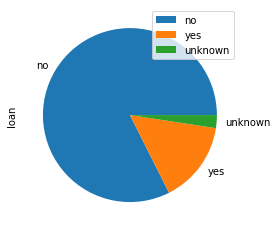

In [30]:
loan_counts = data['loan'].value_counts(normalize=True)
loan_counts.plot(kind='pie', grid=True, legend=True)#, title='Наявність кредиту за освіту')

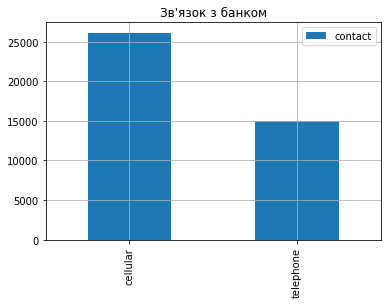

In [31]:
contact_counts = data['contact'].value_counts()
contact_counts.plot(kind='bar', grid=True, legend=True, title="Зв'язок з банком")

C:\python\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Simple pie chart')

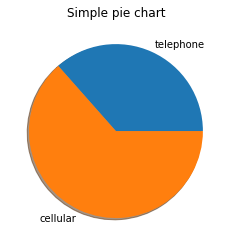

In [32]:
cont = np.array([[len(data.loc[data.contact == 'telephone'])], [len(data.loc[data.contact == 'cellular'])]])
s = ['telephone', 'cellular']

fig = plt.figure()
plt.pie(cont, labels=s, shadow=True)
plt.title('Simple pie chart')

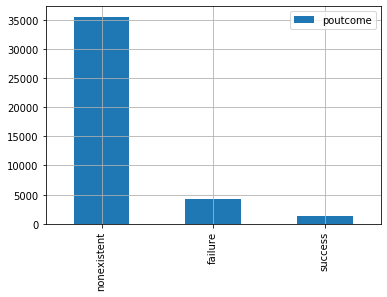

In [33]:
poutcome_counts = data['poutcome'].value_counts()
poutcome_counts.plot(kind='bar', grid=True, legend=True)#, title='Відсоток успішних виданих заявок')

# Деякі пропущені значення 

In [34]:
missing_job = data.loc[data.job == 'unknown']
print('Відсоток невідомих значень: ', len(missing_job)/len(data))
print('Кількість невідомих значень: ', len(missing_job))
missing_job.head()

Відсоток невідомих значень:  0.008012042342429833
Кількість невідомих значень:  330


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35,55,unknown,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,57,unknown,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,unknown,married,unknown,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,unknown,divorced,high.school,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
missing_loan = data.loc[data.loan == 'unknown']
print('Відсоток невідомих значень: ', len(missing_loan)/len(data))
print('Кількість невідомих значень: ', len(missing_loan))
missing_loan.head()

Відсоток невідомих значень:  0.0240361270272895
Кількість невідомих значень:  990


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
missing_education = data.loc[data.education == 'unknown']
print('Відсоток невідомих значень: ', len(missing_education)/len(data))
print('Кількість невідомих значень: ', len(missing_education))
missing_education.head()

Відсоток невідомих значень:  0.042026803923472855
Кількість невідомих значень:  1731


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,unknown,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
missing_marital = data.loc[data.marital == 'unknown']
print('Відсоток невідомих значень: ', len(missing_marital)/len(data))
print('Кількість невідомих значень: ', len(missing_marital))
missing_marital.head()

Відсоток невідомих значень:  0.0019423132951345051
Кількість невідомих значень:  80


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,unknown,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes


In [38]:
missing_default = data.loc[data.default == 'unknown']
print('Відсоток невідомих значень: ', len(missing_default)/len(data))
print('Кількість невідомих значень: ', len(missing_default))
missing_default.head()

Відсоток невідомих значень:  0.20872584247839177
Кількість невідомих значень:  8597


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
missing_housing = data.loc[data.housing == 'unknown']
print('Відсоток невідомих значень: ', len(missing_housing)/len(data))
print('Кількість невідомих значень: ', len(missing_housing))
missing_housing.head()

Відсоток невідомих значень:  0.0240361270272895
Кількість невідомих значень:  990


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Нормалізація(переобразування даних)

In [40]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
transform_bin = {'no':0, 'yes':1, 'unknown':-1}

In [42]:
data['default'] = data['default'].map(transform_bin)
data['housing'] = data['housing'].map(transform_bin)
data['loan'] = data['loan'].map(transform_bin)

In [43]:
transform_edu = {"illiterate":0, "basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, 
                 "professional.course":4, "university.degree":5, "unknown":-1}
data['education']=data['education'].map(transform_edu)

In [44]:
transform_job = {"unemployed":0, "student":1, "housemaid":2, "retired":3, "blue-collar":4, 
                 "services":5, "technician":6, "self-employed":7, "management":8, 
                 "entrepreneur":9, "admin.":10, "unknown":-1}
data['job']=data['job'].map(transform_job)

In [45]:
transform_marital = {"divorced":0, "single":1, "married":2, "unknown":-1}
data['marital'] = data['marital'].map(transform_marital)

In [46]:
#data['contact']=data['contact'].map({'celluar':0, 'telephone':1})


# Питання на рахунок переобразування місяців та днів 

In [47]:
transform_month = {"jan":0, "feb":1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, "aug":7, "sep":8, "oct":9,
                   "nov":10, "dec":11}
data['month']=data['month'].map(transform_month)

In [48]:
transform_day = {"mon":0, "tue":1, "wed":2, "thu":3, "fri":4}
data['day_of_week']=data['day_of_week'].map(transform_day)

In [49]:
transform_outcome = {"failure":0, "success":1, "nonexistent":-1}
data['poutcome']=data['poutcome'].map(transform_outcome)

In [50]:
transform_y = {'no':0, 'yes':1}
data['y']=data['y'].map(transform_y)

In [51]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,2,1,0,0,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,5,2,4,-1,0,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,5,2,4,0,1,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,10,2,2,0,0,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,5,2,4,0,0,1,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


# Кореляція між даними

In [52]:
data.corr()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.101131,0.114983,-0.203464,-0.164910,-0.000987,-0.006048,0.077265,-0.018486,-0.000866,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,-0.101131,1.000000,-0.059689,0.426205,0.150711,0.010712,0.014708,0.069110,0.004048,-0.010435,0.011922,0.016745,-0.012808,-0.011076,0.017049,-0.037144,0.007566,0.025616,0.038008,-0.005773
marital,0.114983,-0.059689,1.000000,-0.102344,-0.103576,-0.003643,0.003134,0.003521,0.004210,-0.001220,-0.002269,0.017635,-0.030222,-0.030627,0.048931,0.024995,0.051013,0.054623,0.050058,-0.026302
education,-0.203464,0.426205,-0.102344,1.000000,0.216788,0.020103,0.013913,0.098723,-0.005163,-0.013686,-0.002398,-0.015210,0.015629,0.020773,-0.039424,-0.090984,0.018668,-0.031283,-0.018979,0.024115
default,-0.164910,0.150711,-0.103576,0.216788,1.000000,0.017429,0.007792,0.084984,0.003915,0.011478,-0.033077,-0.079987,0.102630,0.108394,-0.203061,-0.168335,-0.026249,-0.195079,-0.189544,0.099199
housing,-0.000987,0.010712,-0.003643,0.020103,0.017429,1.000000,0.228650,0.033748,-0.009221,-0.004850,-0.009768,-0.010376,0.017647,0.021599,-0.055645,-0.079528,-0.033586,-0.054698,-0.040855,0.011379
loan,-0.006048,0.014708,0.003134,0.013913,0.007792,0.228650,1.000000,0.003029,0.000662,0.001987,0.004908,-0.000857,-0.003371,-0.000181,-0.000138,-0.011616,-0.015059,-0.001540,0.004260,-0.003142
month,0.077265,0.069110,0.003521,0.098723,0.084984,0.033748,0.003029,1.000000,-0.006959,-0.019302,-0.030635,-0.079556,0.063754,0.060841,0.058874,-0.150350,0.264227,0.163411,0.132697,0.037187
day_of_week,-0.018486,0.004048,0.004210,-0.005163,0.003915,-0.009221,0.000662,-0.006959,1.000000,0.010549,0.015098,0.006765,0.004013,0.003279,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.010051
duration,-0.000866,-0.010435,-0.001220,-0.013686,0.011478,-0.004850,0.001987,-0.019302,0.010549,1.000000,-0.071699,-0.047577,0.020640,0.026465,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274


In [53]:
mask = np.zeros_like(data.corr())
triangle_index = np.triu_indices_from(mask)
mask[triangle_index] = True

print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.

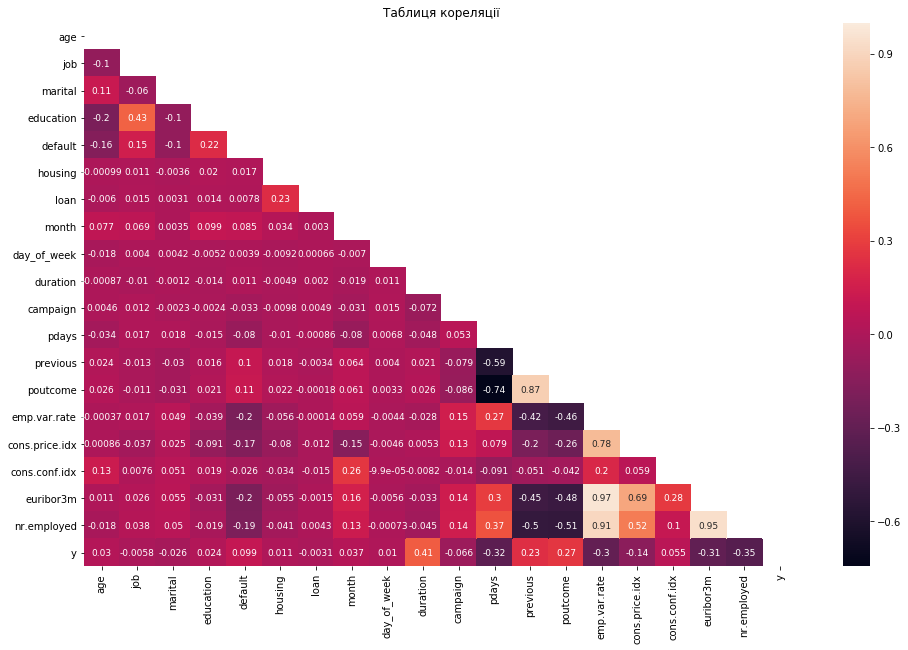

In [54]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':9})
plt.title('Таблиця кореляції')
plt.show()

# Лінійна регресія

In [55]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,2,1,0,0,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,5,2,4,-1,0,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,5,2,4,0,1,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,10,2,2,0,0,0,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,5,2,4,0,0,1,telephone,4,0,...,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


In [56]:
X_data = data.drop(columns=['contact','y'], axis=1)

In [57]:
Y = np.array(data['y'])
X = np.array(data.drop(columns=['contact', 'y'], axis=1))

In [58]:
print(X.shape)

(41188, 19)


# Знаходження коефіцієнтів за допомоги формули

In [59]:
def func(X):
    X_t = X.transpose()           # транспонуємо матрицю Х
    X_t_X = X_t.dot(X)            # множимо х на х_t
    X_t_y = X_t.dot(Y)            # множимо x_t на y
    X_t_X = np.linalg.inv(X_t_X)  # знаходимо обернеру матрицю до x_t_x
    regr = X_t_X.dot(X_t_y)       # x_t_x на x_t_y
    return regr

# Вектор оцінки коефіцієнтів регресії

In [60]:
coffs = func(X)
print(coffs)

[ 0.00048327  0.00017417 -0.00427459  0.00290637  0.01868655  0.00136918
 -0.00203197  0.01080584  0.00173883  0.00046864  0.00122952 -0.00038336
 -0.02447452 -0.02385041 -0.01012127  0.05070471  0.00502902 -0.02351302
 -0.00081247]


In [61]:
first = np.array(X_data.iloc[0])
first

array([ 5.6000e+01,  2.0000e+00,  2.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  4.0000e+00,  0.0000e+00,  2.6100e+02,
        1.0000e+00,  9.9900e+02,  0.0000e+00, -1.0000e+00,  1.1000e+00,
        9.3994e+01, -3.6400e+01,  4.8570e+00,  5.1910e+03])

In [62]:
first_res = coffs.dot(first)
first_res

0.06944089696136846

In [63]:
predicted = []
true_vals = data['y'][:1000]
for i in range(1000, 2000):
    predicted.append((coffs.dot(np.array(X_data.iloc[i]))))

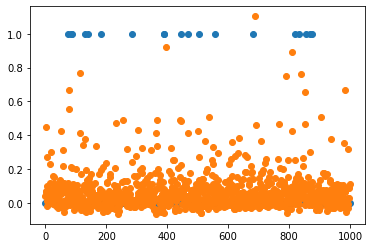

In [64]:
x = np.arange(0, 1000)
plt.plot(x, true_vals, 'o')
plt.plot(x, predicted, 'o')
plt.show()

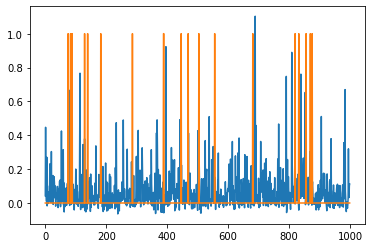

In [65]:
x = np.arange(0, 1000)
plt.plot(x, predicted)
plt.plot(x, true_vals)
plt.show()

# Розподіл датасету 

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
result = data['y']
features = data.drop(['y', 'contact'], axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, result, 
                                                   test_size=0.15, random_state=20)

In [70]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('R squared for train data: ', regr.score(X_train, y_train))
print('R squared for test data: ', regr.score(X_test, y_test))

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

R squared for train data:  0.3267066610523103
R squared for test data:  0.34354731566914365
Intercept:  -6.099158881852625


,coef
age,0.000483
job,-0.000100
marital,-0.003159
education,0.002880
default,0.021087
housing,0.002332
loan,-0.002666
month,0.012327
day_of_week,0.001335
duration,0.000461


In [71]:
test_data_drop = data.drop(['nr.employed', 'job'], axis=1)

result = test_data_drop['y']
features = test_data_drop.drop(['y', 'contact'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, result, 
                                                   test_size=0.25, random_state=20)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('R squared for train data: ', regr.score(X_train, y_train))
print('R squared for test data: ', regr.score(X_test, y_test))

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['ceof'])

R squared for train data:  0.33126444538083777
R squared for test data:  0.32191274081014865
Intercept:  -7.885957898103572


,ceof
age,0.000437
marital,-0.002841
education,0.003393
default,0.019081
housing,0.002986
loan,-0.003679
month,0.012312
day_of_week,0.001639
duration,0.000462
campaign,0.000455


In [72]:
test_data_drop = data.drop(['cons.price.idx', 'job', 'age',
                            'marital', 'education', 'housing', 'loan',
                            'day_of_week'], axis=1)

features = features = test_data_drop.drop(['y', 'contact'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, result, 
                                                   test_size=0.25, random_state=20)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('R squared for train data: ', regr.score(X_train, y_train))
print('R squared for test data: ', regr.score(X_test, y_test))

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['ceof'])

R squared for train data:  0.32773937830379096
R squared for test data:  0.31708843322921154
Intercept:  7.150938349849403


,ceof
default,0.019472
month,0.008765
duration,0.000462
campaign,0.000951
pdays,-0.000402
previous,-0.031031
poutcome,-0.013271
emp.var.rate,0.010683
cons.conf.idx,0.003391
euribor3m,-0.009234


# Навчання моделі з допомогою бібліотек

In [73]:
model = LinearRegression()
model.fit(X_data, Y)

r_sq = model.score(X_data, Y)
print("Coefficient of determination: ", r_sq)

b0 = model.intercept_
print('\nCoefficient b0: ', model.intercept_)

b = model.coef_
print('\nCoefficients b:\n', model.coef_)

Coefficient of determination:  0.32932439804891744

Coefficient b0:  -6.21210538978951

Coefficients b:
 [ 0.00048188  0.00021395 -0.00422914  0.00304988  0.01886521  0.00204508
 -0.00199077  0.01235295  0.00163918  0.00046907  0.00102776 -0.00038087
 -0.02346309 -0.02419524 -0.01789469  0.08555419  0.00691336 -0.0499905
 -0.00021021]


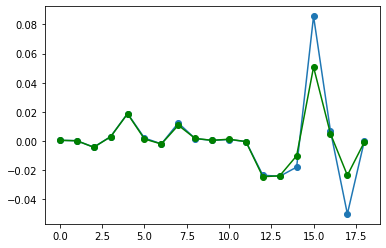

In [74]:
plt.figure()
plt.plot(b, '-o')
plt.plot(coffs, '-o', color='green')
plt.show()

# Передбачаємо дані

In [75]:
predict = model.predict(X_data)
print(predict)

[0.06270704 0.00157964 0.04897043 ... 0.37025994 0.47767054 0.35270679]


In [76]:
regr_data = data.drop(['cons.price.idx', 'job', 'age', 'y', 'contact',
                            'marital', 'education', 'housing', 'loan',
                            'day_of_week'], axis=1)
regr_data.head()

,default,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
0,0,4,261,1,999,0,-1,1.1,-36.4,4.857,5191.0
1,-1,4,149,1,999,0,-1,1.1,-36.4,4.857,5191.0
2,0,4,226,1,999,0,-1,1.1,-36.4,4.857,5191.0
3,0,4,151,1,999,0,-1,1.1,-36.4,4.857,5191.0
4,0,4,307,1,999,0,-1,1.1,-36.4,4.857,5191.0


## Протестуємо нашу модель на випадкових даних без покращення показників

In [77]:
start_data.iloc[19]

age                      39
job                       8
marital                   1
education                 3
default                  -1
housing                   0
loan                      0
contact           telephone
month                     4
day_of_week               0
duration                195
campaign                  1
pdays                   999
previous                  0
poutcome                 -1
emp.var.rate            1.1
cons.price.idx       93.994
cons.conf.idx         -36.4
euribor3m             4.857
nr.employed            5191
y                         0
Name: 19, dtype: object

In [78]:
first_predict = np.array(X_data.iloc[19])
first_predict = first_predict.reshape(-1,1)
print("Передбачений результат: ", b0 + b.dot(first_predict))

Передбачений результат:  [0.01630394]


In [79]:
start_data.iloc[37894]

age                     35
job                      9
marital                  2
education                4
default                  0
housing                  0
loan                     0
contact           cellular
month                    8
day_of_week              1
duration                91
campaign                 2
pdays                  999
previous                 0
poutcome                -1
emp.var.rate          -3.4
cons.price.idx      92.379
cons.conf.idx        -29.8
euribor3m            0.819
nr.employed         5017.5
y                        0
Name: 37894, dtype: object

In [80]:
second_predict = np.array(regr_data.iloc[37894])
second_predict = second_predict.reshape(1,-1)
print("Передбачений результат: ", regr.predict(second_predict))

Передбачений результат:  [0.27042446]


In [81]:
start_data.iloc[41159]

age                     35
job                      6
marital                  0
education                1
default                  0
housing                  1
loan                     0
contact           cellular
month                   10
day_of_week              1
duration               514
campaign                 1
pdays                    9
previous                 4
poutcome                 1
emp.var.rate          -1.1
cons.price.idx      94.767
cons.conf.idx        -50.8
euribor3m            1.035
nr.employed         4963.6
y                        1
Name: 41159, dtype: object

In [82]:
third_predict = np.array(regr_data.iloc[41159])
third_predict = third_predict.reshape(1,-1)
print("Передбачений результат: ", regr.predict(third_predict))

Передбачений результат:  [0.75035568]


In [83]:
X_data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,2,2,1,0,0,0,4,0,261,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
1,57,5,2,4,-1,0,0,4,0,149,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
2,37,5,2,4,0,1,0,4,0,226,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
3,40,10,2,2,0,0,0,4,0,151,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0
4,56,5,2,4,0,0,1,4,0,307,1,999,0,-1,1.1,93.994,-36.4,4.857,5191.0


# Створимо випадкового клієнта, який хоче взяти кредит в банку

In [121]:
random_prediction = [
    random.randint(18,99),                # вік
    random.randint(-1,10),                # робота
    random.randint(-1,2),                 # сімейний статус
    random.randint(-1,5),                 # освіта
    random.choice([-1,0,1]),              # заборгованість
    random.choice([-1,0,1]),              # заборгованість по будинку
    random.choice([-1,0,1]),              # кредит
    random.randint(0,11),                 # місяць
    random.randint(0,6),                  # день
    random.randint(0,5000),               # тривалість останнього контакту
    random.randint(1,56),                 # кількість дзвінків, з початку взяття позики
    random.randint(0,999),                # кількість днів, з часу останньої позики
    random.randint(0,7),                  # кількість дні перед тим, як взято позику
    random.choice([-1,0,1]),              # результат попередньої кампанії (взяття позики)
    random.uniform(-3.4,1.4),             # коефіцієнт зайнятості
    random.uniform(92.2,94.7),            # індекс споживача
    random.uniform(-50.8,-26.9),          # індекс довіри
    random.uniform(0.63,5.04),            # місячна норма (щодня)
    random.uniform(4963.6,5228.1)         # місячна норма (квартал)
]
random_prediction = np.array(random_prediction)
print(random_prediction)

[ 7.90000000e+01  6.00000000e+00  2.00000000e+00  2.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.00000000e+00
  0.00000000e+00  1.65800000e+03  3.40000000e+01  3.80000000e+02
  2.00000000e+00  0.00000000e+00 -7.96895219e-01  9.24699852e+01
 -3.62502165e+01  3.25995962e+00  5.04634065e+03]


In [122]:
random_prediction = random_prediction.reshape(1,-1)
print("Передбачений результат LR: ", model.predict(random_prediction))
print("Передбачений результат LOC-R: ", log_regr.predict(random_prediction))

Передбачений результат LR:  [0.92167266]
Передбачений результат LOC-R:  [1]


In [86]:
X_data.describe()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,6.210717,1.489366,3.521317,-0.208653,0.499806,0.127659,5.607896,1.979581,258.285010,2.567593,962.475454,0.172963,-0.830096,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.869429,0.696779,1.551084,0.406530,0.545967,0.399297,2.040998,1.411514,259.279249,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000,102.000000,1.000000,999.000000,0.000000,-1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,6.000000,2.000000,4.000000,0.000000,1.000000,0.000000,5.000000,2.000000,180.000000,2.000000,999.000000,0.000000,-1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,10.000000,2.000000,5.000000,0.000000,1.000000,0.000000,7.000000,3.000000,319.000000,3.000000,999.000000,0.000000,-1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,10.000000,2.000000,5.000000,1.000000,1.000000,1.000000,11.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Логістична регресія

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_regr = LogisticRegression()
log_regr.fit(X_data, Y)
Y_predicted = log_regr.predict(X_data)
Y_predicted

C:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [89]:
print('R squared: ', log_regr.score(X_data, Y))

R squared:  0.9097067106924347


In [90]:
log_regr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

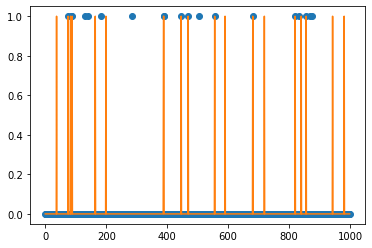

In [91]:
x = np.arange(0, 1000)
plt.plot(x, true_vals, 'o')
plt.plot(x, Y_predicted[:1000])
plt.show()

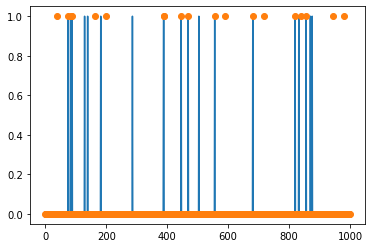

In [92]:
x = np.arange(0, 1000)
plt.plot(x, true_vals)
plt.plot(x, Y_predicted[:1000], 'o')
plt.show()